### Apple stock market
#### Practise doing LSTM model to predict Apple stock price following Fares Sayah in Kaggle.com

### Import libraries

In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

### Read the file

In [149]:
apple = pd.read_csv('HistoricalQuotes.csv')
apple.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


### Check number of rows and columns

In [150]:
apple.shape

(2518, 6)

### Check column names

In [151]:
apple.columns

Index(['Date', ' Close/Last', ' Volume', ' Open', ' High', ' Low'], dtype='object')

### Strip column names

In [152]:
i = 0
for col in apple.columns:
    if ' ' in col:
        col = col.replace(' ', '')
        apple = apple.rename(columns={apple.columns[i]: col})
    i+=1
apple.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

### Create a new column named 'Adj_Close'

In [153]:
apple['Adj_Close'] = apple['Close/Last']
apple.head()

,Date,Close/Last,Volume,Open,High,Low,Adj_Close
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37,$273.36
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96,$273.52
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5,$292.65
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13,$288.08
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23,$298.18


### Delete dollar sign and change a type of listed columns to float

In [154]:
cols = ['Close/Last', 'Open', 'High', 'Low', 'Adj_Close']
for col in cols:
    apple[col] = apple[col].apply(lambda x: x.replace('$', ''))
    apple[col] = apple[col].astype(float)
apple.head()

,Date,Close/Last,Volume,Open,High,Low,Adj_Close
0,02/28/2020,273.36,106721200,257.26,278.41,256.37,273.36
1,02/27/2020,273.52,80151380,281.10,286.00,272.96,273.52
2,02/26/2020,292.65,49678430,286.53,297.88,286.50,292.65
3,02/25/2020,288.08,57668360,300.95,302.53,286.13,288.08
4,02/24/2020,298.18,55548830,297.26,304.18,289.23,298.18


In [155]:
apple.head(50)

,Date,Close/Last,Volume,Open,High,Low,Adj_Close
0,02/28/2020,273.36,106721200,257.260,278.4100,256.3700,273.36
1,02/27/2020,273.52,80151380,281.100,286.0000,272.9600,273.52
2,02/26/2020,292.65,49678430,286.530,297.8800,286.5000,292.65
3,02/25/2020,288.08,57668360,300.950,302.5300,286.1300,288.08
4,02/24/2020,298.18,55548830,297.260,304.1800,289.2300,298.18
5,02/21/2020,313.05,32426420,318.620,320.4500,310.5000,313.05
6,02/20/2020,320.30,25141490,322.630,324.6500,318.2100,320.30
7,02/19/2020,323.62,23495990,320.000,324.5700,320.0000,323.62
8,02/18/2020,319.00,38190550,315.360,319.7500,314.6100,319.00
9,02/14/2020,324.95,20028450,324.740,325.9800,322.8500,324.95


### Change column type of 'Date' to datetime and sort the date

In [156]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [157]:
apple = apple.sort_values(['Date'])
apple

,Date,Close/Last,Volume,Open,High,Low,Adj_Close
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,29.8557
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,29.8357
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,29.9043
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,30.1014
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,31.2786
...,...,...,...,...,...,...,...
4,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,298.1800
3,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,288.0800
2,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,292.6500
1,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600,273.5200


In [158]:
apple.dtypes

Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
Adj_Close            float64
dtype: object

### Check data whether there is null or not

In [159]:
apple.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
Adj_Close     False
dtype: bool

### Plot closed price and volume

<AxesSubplot:xlabel='Date', ylabel='Volume'>

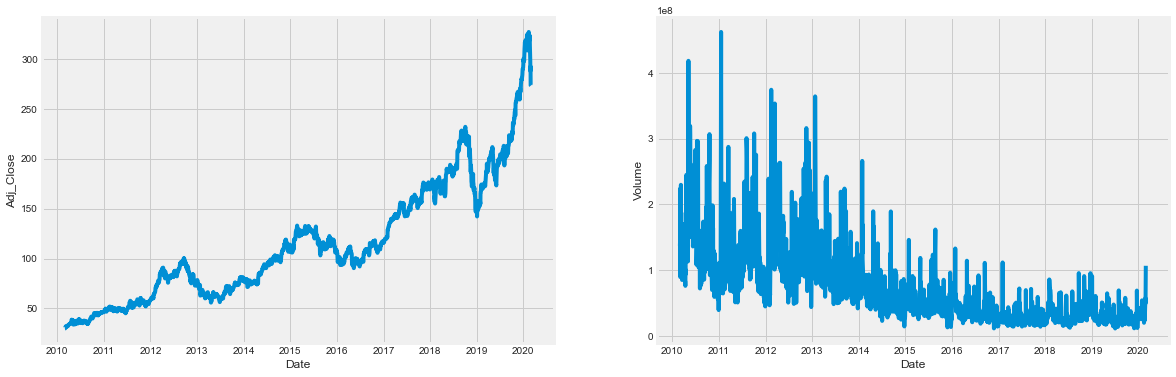

In [160]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
sns.lineplot(data=apple, x='Date', y='Adj_Close', ax=ax[0])
sns.lineplot(data=apple, x='Date', y='Volume', ax=ax[1])

### Create new columns which are moving average of 25, 75, and 200 days

In [161]:
ma_day = [25, 75, 200]
for ma in ma_day:
    col = f'MA_{ma}_Days'
    apple[col] = apple['Adj_Close'].rolling(ma).mean()

In [162]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low,Adj_Close,MA_25_Days,MA_75_Days,MA_200_Days
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,29.8557,NaN,NaN,NaN
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,29.8357,NaN,NaN,NaN
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,29.9043,NaN,NaN,NaN
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,30.1014,NaN,NaN,NaN
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,31.2786,NaN,NaN,NaN


### Plot closed prices along with moving average of 25, 75, and 200 days 

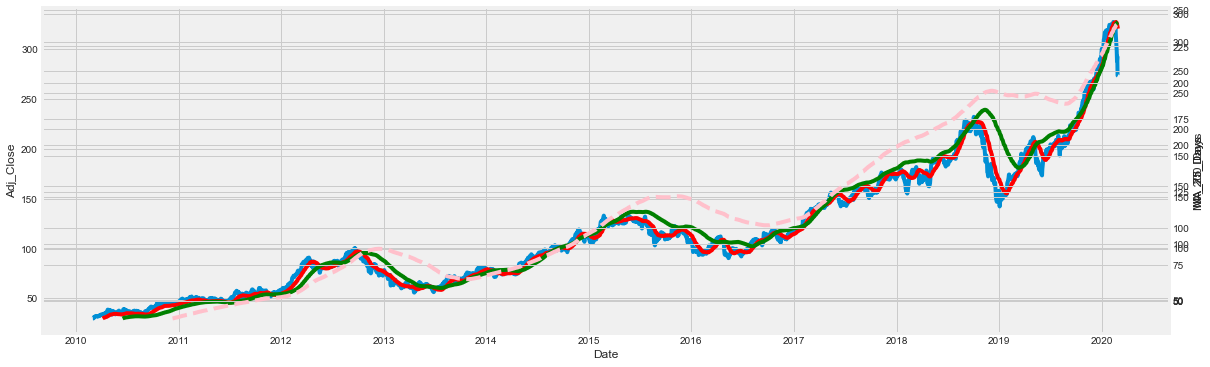

In [163]:
fig = plt.figure(figsize=(18,6))
plot_1st = sns.lineplot(data=apple, x='Date', y='Adj_Close')
plot_2nd = plot_1st.twinx()
plot_2nd = sns.lineplot(data=apple, x='Date', y='MA_25_Days', color='Red')
plot_3rd = plot_1st.twinx()
plot_3rd = sns.lineplot(data=apple, x='Date', y='MA_75_Days', color='Green')
plot_4th = plot_1st.twinx()
plot_4th = sns.lineplot(data=apple, x='Date', y='MA_200_Days', color='Pink', linestyle='--')

### Create a new column which is percentage change 

In [164]:
apple['Daily_Return'] = apple['Adj_Close'].pct_change()
apple.head()

,Date,Close/Last,Volume,Open,High,Low,Adj_Close,MA_25_Days,MA_75_Days,MA_200_Days,Daily_Return
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,29.8557,NaN,NaN,NaN,NaN
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,29.8357,NaN,NaN,NaN,-0.000670
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,29.9043,NaN,NaN,NaN,0.002299
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,30.1014,NaN,NaN,NaN,0.006591
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,31.2786,NaN,NaN,NaN,0.039108


### Plot percentage change

<AxesSubplot:xlabel='Date', ylabel='Daily_Return'>

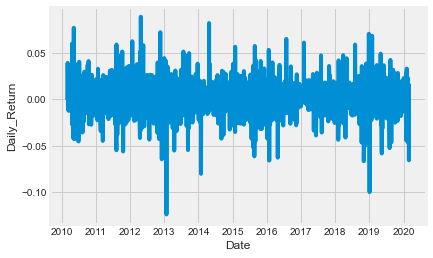

In [165]:
sns.lineplot(data=apple, x='Date', y='Daily_Return')

### Plot count of percentage change

<AxesSubplot:xlabel='Daily_Return', ylabel='Count'>

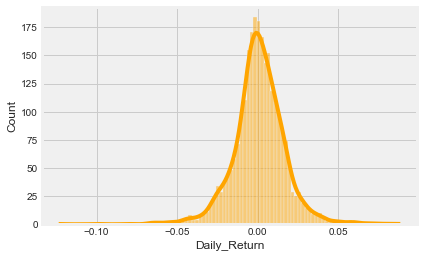

In [166]:
sns.histplot(apple['Daily_Return'].dropna(), bins=100, color='Orange', kde=True)

### Plot heatmap

<AxesSubplot:>

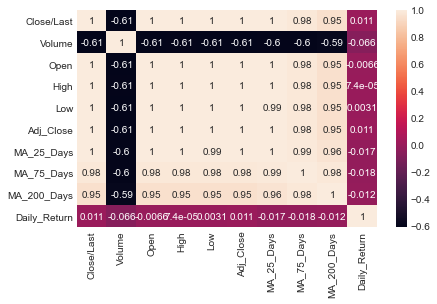

In [167]:
apple_corr = apple.corr()
sns.heatmap(apple_corr, annot=True)

In [168]:
apple.head()

,Date,Close/Last,Volume,Open,High,Low,Adj_Close,MA_25_Days,MA_75_Days,MA_200_Days,Daily_Return
2517,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,29.8557,NaN,NaN,NaN,NaN
2516,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,29.8357,NaN,NaN,NaN,-0.000670
2515,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,29.9043,NaN,NaN,NaN,0.002299
2514,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,30.1014,NaN,NaN,NaN,0.006591
2513,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,31.2786,NaN,NaN,NaN,0.039108


### Implement LSTM model

In [169]:
close = apple.filter(['Close/Last'])
close = close.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(close) * .95 ))

training_data_len

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close)

scaled_data

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       ...,
       [8.83812549e-01],
       [8.19480684e-01],
       [8.18942624e-01]])

In [170]:
training_data_len

2393

In [171]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([6.72575693e-05, 0.00000000e+00, 2.30693463e-04, 8.93516807e-04,
       4.85229733e-03, 4.91451059e-03, 6.80747487e-03, 7.68182327e-03,
       7.99894271e-03, 8.52725092e-03, 7.20126794e-03, 7.49451094e-03,
       7.33578308e-03, 7.59035298e-03, 6.43755824e-03, 7.63844214e-03,
       9.37267856e-03, 9.85794193e-03, 8.55146364e-03, 1.05930672e-02,
       1.13090240e-02, 1.29686045e-02, 1.25627051e-02, 1.30288000e-02,
       1.42394363e-02, 1.47438680e-02, 1.52530078e-02, 1.49409327e-02,
       1.58246972e-02, 1.60648067e-02, 1.61320643e-02, 1.76984931e-02,
       1.92501252e-02, 1.85197080e-02, 1.83613164e-02, 1.71698486e-02,
       2.41982646e-02, 2.76811978e-02, 2.97759348e-02, 2.91369879e-02,
       2.55531683e-02, 2.53416432e-02, 2.87236901e-02, 2.50968257e-02,
       2.76236926e-02, 2.39389866e-02, 2.26442784e-02, 1.79675233e-02,
       1.29760028e-02, 2.16858581e-02, 2.29012023e-02, 2.55770447e-02,
       2.37853031e-02, 2.16041401e-02, 2.17961605e-02, 2.09026437e-02,
     

In [172]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=64, epochs=1)

37/37 [==============================] - 4s 97ms/step - loss: 0.0059


In [173]:
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = close[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

10.816867561264239

C:\Users\Z-Service\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


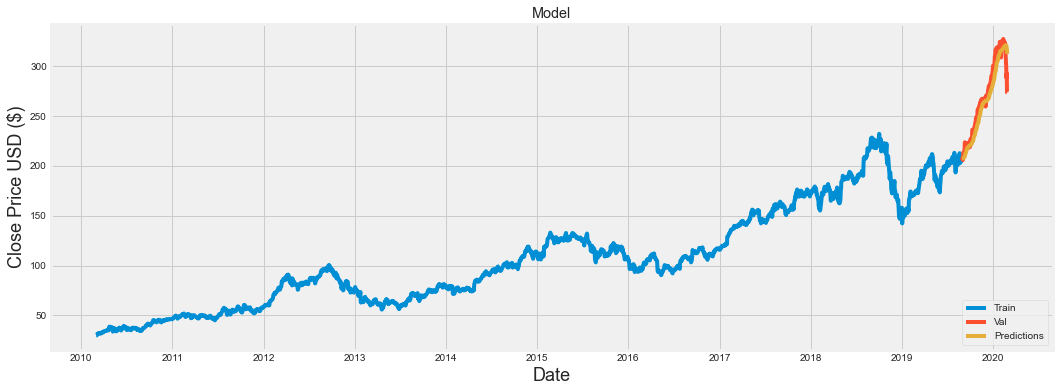

In [174]:
# Plot the data
train = apple[:training_data_len]
valid = apple[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
sns.lineplot(data=train, x='Date', y='Close/Last')
sns.lineplot(data=valid, x='Date', y='Close/Last')
sns.lineplot(data=valid, x='Date', y='Predictions')
# plt.plot(train['Close/Last'])
# plt.plot(valid[['Close/Last', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [178]:
valid

,Date,Close/Last,Volume,Open,High,Low,Adj_Close,MA_25_Days,MA_75_Days,MA_200_Days,Daily_Return,Predictions
124,2019-08-30,208.74,21162560,210.16,210.45,207.20,208.74,205.6228,198.431600,185.682150,-0.001292,207.318283
123,2019-09-03,205.70,20059570,206.43,206.98,204.22,205.70,205.4636,198.639867,185.749500,-0.014564,207.490021
122,2019-09-04,209.19,19216820,208.39,209.48,207.32,209.19,205.4800,198.909067,185.861450,0.016966,207.564819
121,2019-09-05,213.28,23946880,212.00,213.97,211.51,213.28,205.4896,199.311600,185.970800,0.019552,207.704575
120,2019-09-06,213.26,19362290,214.05,214.42,212.51,213.26,205.6828,199.667067,186.069450,-0.000094,208.041336
...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-02-24,298.18,55548830,297.26,304.18,289.23,298.18,318.4572,291.745333,240.056375,-0.047500,320.696655
3,2020-02-25,288.08,57668360,300.95,302.53,286.13,288.08,317.2312,292.158000,240.493175,-0.033872,319.706909
2,2020-02-26,292.65,49678430,286.53,297.88,286.50,292.65,316.2744,292.630133,240.970525,0.015864,317.796265
1,2020-02-27,273.52,80151380,281.10,286.00,272.96,273.52,314.5072,292.818000,241.409525,-0.065368,315.487366
